### EDA - auto+mpg - Parte I

In [ ]:
# Exemplo EDA sobre o dataset de datos de coches
# https://www.datafied.world/eda-on-mpg-data-using-seaborn-192

Analizar las variables categóricas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 'mpg' é un coñecido dataset con datos de automóbiles que se encontra como exemplo na libraría 'seaborn'
# Tamén dispoñible no UCI: Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/auto+mpg

# O repositorio proporciona a seguinte información:
# Attribute Information:

# 1. mpg: continuous
# 2. cylinders: multi-valued discrete
# 3. displacement: continuous
# 4. horsepower: continuous
# 5. weight: continuous
# 6. acceleration: continuous
# 7. model year: multi-valued discrete
# 8. origin: multi-valued discrete
# 9. car name: string (unique for each instance)

In [2]:
df = sns.load_dataset('mpg')

In [ ]:
# Fases do EDA
# 1. Preprocesar os datos
# 2. EDA sobre atributos categóricos: analizar distribución e relacións con outros categóricos
# 3. EDA sobre atributos numéricos: analizar distribució e relacións con outros numéricos
# 4. Análise da relación entre categóricos e numéricos

In [ ]:
# PREPROCESADO DOS DATOS

In [3]:
# Unha ollada aos datos

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# Tamaño do dataset? Filas? Atributos?
df.shape

(398, 9)

In [5]:
# Listar todas as columnas
columns = list(df.columns)
columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']

In [6]:
# Consultar os tipos de datos, se hai valores nulos..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
# Creamos dúas listas diferentes:
# - nomes das columnas categóricas
# - nomes das columnas numéricas 
# Isto facilitará o tratamento das diferentes variables por separado

cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'Variables categóricas: {cats}')
print(f'Variables numéricas: {nums}')

Variables categóricas: ['origin', 'name']
Variables numéricas: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [8]:
# Consultamos o número de valores diferentes en cada columna
df.nunique(axis=0)

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [ ]:
# cylinders e model_year teñen moi pouca variabilidade -> ten sentido facelos categóricos
# Movémolos á lista de variables categóricas

In [9]:
cats.extend(['cylinders','model_year'])
nums.remove('cylinders')
nums.remove('model_year')
print(f'Variables categóricas: {cats}')
print(f'Variables numéricas: {nums}')

Variables categóricas: ['origin', 'name', 'cylinders', 'model_year']
Variables numéricas: ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [10]:
# búsqueda de nans - TRATAMENTO DE MISSING VALUES
df.isna().sum()
# df.isnull().sum() <- isnull() é un alias de isna()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [11]:
# mostrar as liñas que teñen nan
df[df.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [12]:
# mais xeralmente
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [13]:
# proporción de nans
6 / len(df)

0.01507537688442211

In [ ]:
# A porcentaxe é baixa (un 1,5%), logo podemos machacar esas liñas
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [14]:
df.shape

(398, 9)

In [ ]:

# df = df[~df.isnull().any(axis=1)]
# df.reset_index(inplace=True)
# df.drop('index', inplace=True, axis=1)

In [ ]:
# TRATAMENTO DE DUPLICADOS

In [15]:
# Buscar filas duplicadas
print(f'Total de filas duplicadas: {df.duplicated().sum()}')

Total de filas duplicadas: 0


In [16]:
# No caso de que houbese duplicados (que non hai), eliminamos
df.drop_duplicates(inplace=True)
df.shape

(398, 9)

In [ ]:
# df = df[~df.duplicated()]
# df.shape

In [17]:
# Podemos agrupar as variables por tipo por comodidade (recolocar as columnas)
# bloque categóticas vs bloque numéricas
df = pd.concat((df[cats], df[nums]), axis=1)
df.head()

,origin,name,cylinders,model_year,mpg,displacement,horsepower,weight,acceleration
0,usa,chevrolet chevelle malibu,8,70,18.0,307.0,130.0,3504,12.0
1,usa,buick skylark 320,8,70,15.0,350.0,165.0,3693,11.5
2,usa,plymouth satellite,8,70,18.0,318.0,150.0,3436,11.0
3,usa,amc rebel sst,8,70,16.0,304.0,150.0,3433,12.0
4,usa,ford torino,8,70,17.0,302.0,140.0,3449,10.5


In [18]:
num_rows, num_cols = df.shape

In [19]:
# Pode ser unha boa idea gardar os datos unha vez limpos e preprocesados
df.to_csv('mpg_cleaned.csv',index=False)

In [ ]:
# ANÁLISE DOS VALORES CATEGÓRICOS

# Despois da limpeza dos datos procedemos á análise das variables categóricas

In [20]:
df = pd.read_csv('mpg_cleaned.csv')

In [21]:
print(f'categorical variables: {cats}')

categorical variables: ['origin', 'name', 'cylinders', 'model_year']


In [22]:
# Creamos un novo dataframe só coas variables categóricas

#df_cat = df.loc[:, 'origin':'model_year']
df_cat= df[cats]
df_cat.head()

,origin,name,cylinders,model_year
0,usa,chevrolet chevelle malibu,8,70
1,usa,buick skylark 320,8,70
2,usa,plymouth satellite,8,70
3,usa,amc rebel sst,8,70
4,usa,ford torino,8,70


In [23]:
# limpeza de columnas tipo string, eliminando espazos extra (por precaución)
# Ollo a: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
for col in ['origin', 'name']:
    df_cat[col] = df_cat[col].apply(lambda x: ' '.join(x.split()))

/tmp/ipykernel_2588/2901510801.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = df_cat[col].apply(lambda x: ' '.join(x.split()))


In [ ]:
# Pode ser útil crear niveis categóricos para algunhas variables (p.ex: mpg)
# Axudará á hora de crear algúns gráficos e ademais facilita a comprensión
# Engadimos unha nova variable categórica

In [24]:
df_cat['mpg_level'] = df['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
cats.append('mpg_level')
print(f'Variables categóricas:  {cats}')

Variables categóricas:  ['origin', 'name', 'cylinders', 'model_year', 'mpg_level']


/tmp/ipykernel_2588/3240510576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['mpg_level'] = df['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')


In [25]:
# Botar unha ollada aos valores das categorías
print(f"Categorías en origin: {pd.unique(df_cat['origin'])}")
print(f"Categorías en cylinders: {pd.unique(df_cat['cylinders'])}")
print(f"Categorías en model_year: {pd.unique(df_cat['model_year'])}")

Categorías en origin: ['usa' 'japan' 'europe']
Categorías en cylinders: [8 4 6 3 5]
Categorías en model_year: [70 71 72 73 74 75 76 77 78 79 80 81 82]


In [ ]:
# Análise da distribución 
#
# Queremos ver como se distribúen os datos e sacar algunha información das gráficas

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='origin', ylabel='count'>

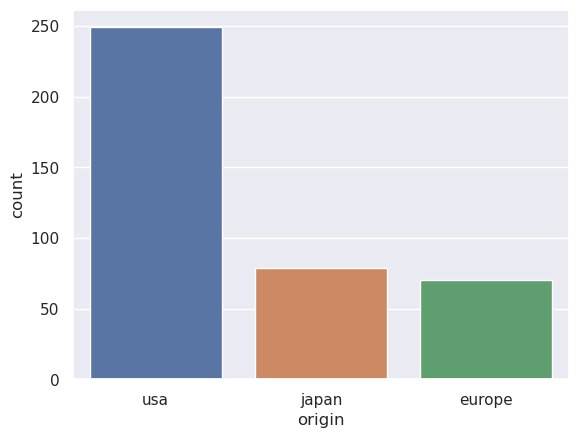

In [26]:
# Countplot pode ser unha boa opción para ver como se distribúen os datos nas variables categóricas
sns.set_theme(style='darkgrid')

# Distribución de "orixe"
sns.countplot(data=df_cat,x='origin')

In [ ]:
# A maioría dos datos son de coches estadounidenses

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='cylinders', ylabel='count'>

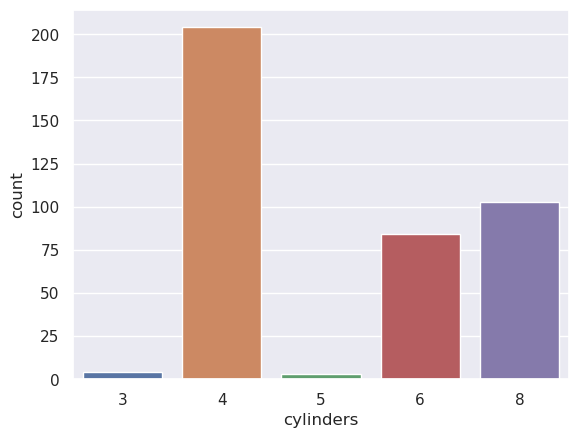

In [27]:
# Distribución de "cilindros"
sns.countplot(data=df_cat,x='cylinders')

In [ ]:
# O mais común son coches con motores de 4 ciclindros. As versións de 3 e 5 son anecdóticas.

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='model_year', ylabel='count'>

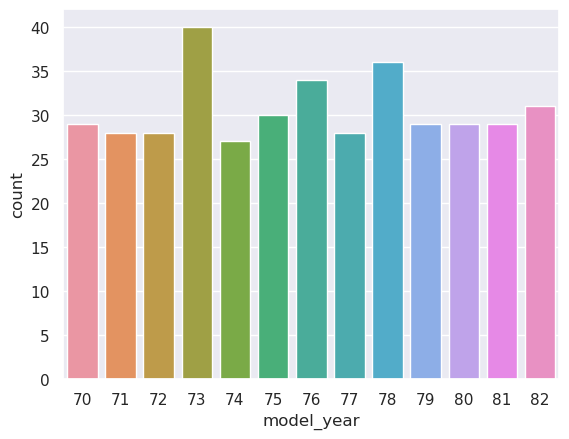

In [28]:
# Distribución dos datos segundo "model_year"
sns.countplot(data=df_cat,x='model_year')

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='mpg_level', ylabel='count'>

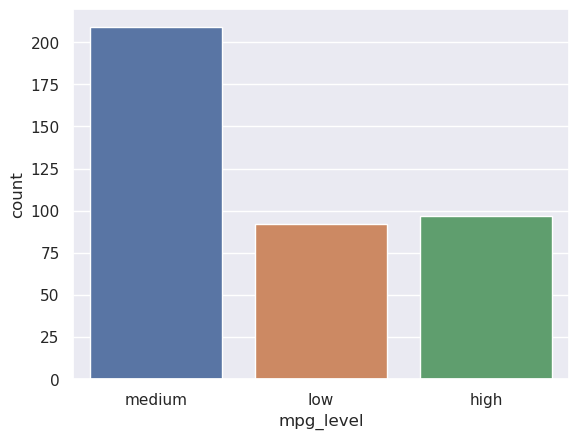

In [29]:
# Distribución de "mpg_level"
sns.countplot(data=df_cat,x='mpg_level')

In [ ]:
# Pode ter sentido ordenar as barras en función de importancia

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

<Axes: title={'center': 'Orde de relevancia'}, xlabel='model_year', ylabel='count'>

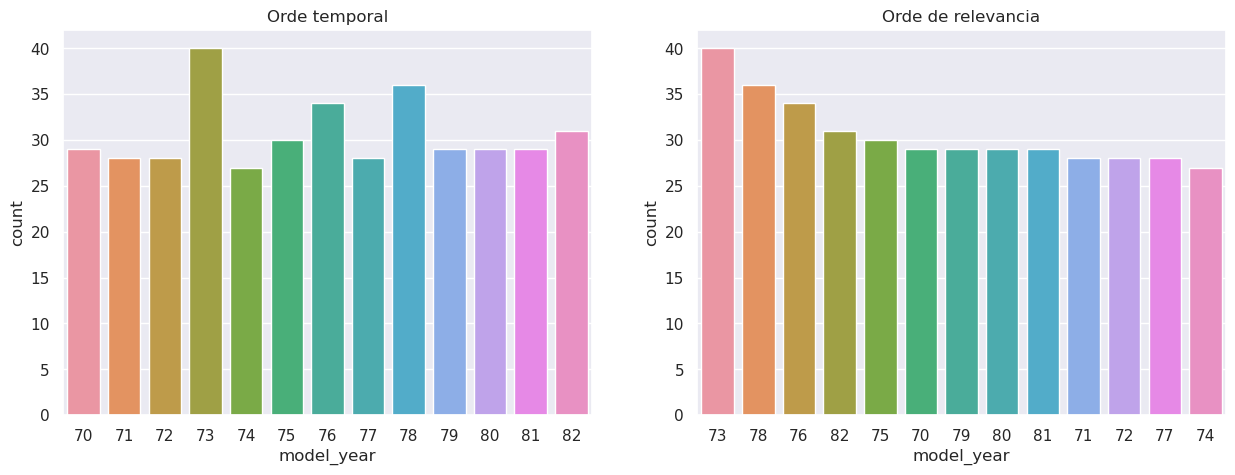

In [30]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
ax.set_title('Orde temporal')
sns.countplot(data=df_cat,x='model_year')
ax = plt.subplot(1,2,2)
ax.set_title('Orde de relevancia')
sns.countplot(data=df_cat,x='model_year',order=df_cat.model_year.value_counts().index)

In [ ]:
# Podemos agrupar as gráficas

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

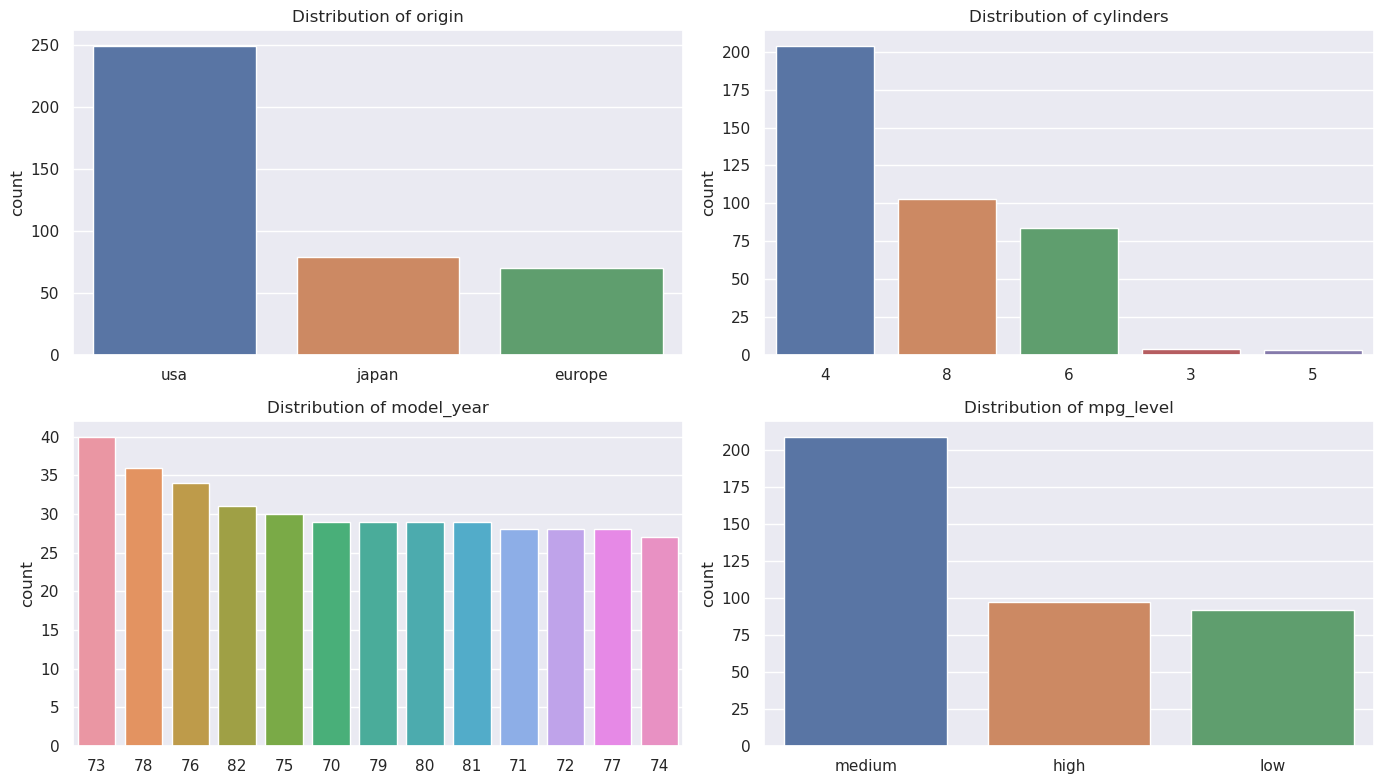

In [31]:
fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cat.drop(['name'], axis=1).columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(data=df_cat,x=cat, order=df_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

In [32]:
# Cálculo da proporción das clases dominantes en relación co resto da súa categoría
for i,cat in enumerate(df_cat.drop(['name'], axis=1).columns):
    val_counts = df_cat[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / num_rows
    print(f'`{val_counts.index[0]}` contribúe por si sóa nun {round(dominant_frac * 100, 2)}% de {cat}')

`usa` contribúe por si sóa nun 62.56% de origin
`4` contribúe por si sóa nun 51.26% de cylinders
`73` contribúe por si sóa nun 10.05% de model_year
`medium` contribúe por si sóa nun 52.51% de mpg_level


In [ ]:
# Funcionamento de value_counts
# df_cat.cylinders.value_counts()

In [ ]:
# NOVA INFORMACIÓN EXTRAÍDA DA ANÁLISE  -- Insights

# - Orixe desequilibrado en favor de usa, maior que a suma dos competidores
# - Cilindros desequilibrado en favor de 4
# - mpg_level (que fixemos categórica) desequilibrio en favor de medium (que é un rango maior)
# - model_year -> equilibrado

In [33]:
# analizar os nomes dos modelos 'name'
print(f'Número de categorías diferentes en  `name`: {df_cat.name.nunique()}')
print(f"\nListaxe de categorías en `name`:\n\n {df_cat.name.unique()}")

Número de categorías diferentes en  `name`: 305

Listaxe de categorías en `name`:

 ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 

In [34]:
# Os nomes inclúen a marca!

# Podemos extraer a marca/compañía de `name` , coa intención de crear unha nova categoría 
df_cat['car_company'] = df_cat['name'].apply(lambda x: x.split()[0])

# Eliminamos a Compañía e deixamos só o modelo
df_cat['car_name'] = df_cat['name'].apply(lambda x: ' '.join(x.split()[1:]))
df_cat.drop('name', axis=1, inplace=True)

cats.extend(['car_company', 'car_name'])
cats.remove('name')

print(f'Variables categóricas:  {cats}')
df_cat.head()

Variables categóricas:  ['origin', 'cylinders', 'model_year', 'mpg_level', 'car_company', 'car_name']


/tmp/ipykernel_2588/3126798779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['car_company'] = df_cat['name'].apply(lambda x: x.split()[0])
/tmp/ipykernel_2588/3126798779.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['car_name'] = df_cat['name'].apply(lambda x: ' '.join(x.split()[1:]))
/tmp/ipykernel_2588/3126798779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,origin,cylinders,model_year,mpg_level,car_company,car_name
0,usa,8,70,medium,chevrolet,chevelle malibu
1,usa,8,70,low,buick,skylark 320
2,usa,8,70,medium,plymouth,satellite
3,usa,8,70,low,amc,rebel sst
4,usa,8,70,medium,ford,torino


In [35]:
# Investigamos as categorías en `car_company`
print(f'Número de categorías en `car_company`: {df_cat.car_company.nunique()}')
print(f"\nListaxe de categorías en `car_company`:\n\n {df_cat.car_company.unique()}")

Número de categorías en `car_company`: 37

Listaxe de categorías en `car_company`:

 ['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'toyouta' 'maxda' 'honda' 'subaru' 'chevroelt' 'capri' 'vw'
 'mercedes-benz' 'cadillac' 'mercedes' 'vokswagen' 'triumph' 'nissan']


/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


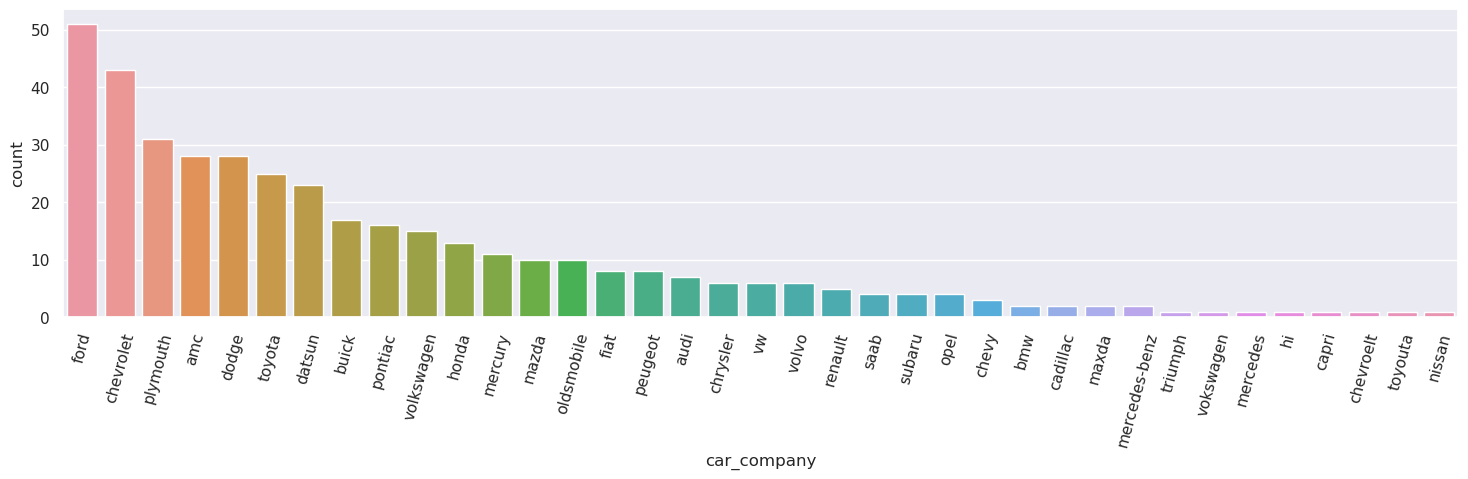

In [37]:
# Agora xa podemos analizar a distribución dos datos en función da marca/compañía
fig = plt.figure(1, (18, 4))

ax1 = plt.subplot(1,1,1)
sns.countplot(data=df_cat,x='car_company', order=df_cat['car_company'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

plt.show()

In [38]:
df_cat.car_company.value_counts()[:2]

car_company
ford         51
chevrolet    43
Name: count, dtype: int64

In [ ]:
# NOVA INFORMACIÓN EXTRAÍDA DA ANÁLISE  -- Insights

# - car_name ten demasiadas categorías, practicamente unha por liña, polo que non nos daría ningunha información útil
# - creamos unha nova variable 'car_company' para as marcas dos coches, reducindo en gran medida o número de categorías
# - a distribución de car_company non é uniforme e poucas compañías abarcan a maior parte dos modelos de coche

In [ ]:
# CONCLUSIÓNS

# * Todos os atributos categóricos (excepto model_year) están moi desbalanceados e lonxe da distribución uniforme.
# * En todos os datos concéntranse en poucas categorías

In [ ]:
# Recordamos o índice:

# Fases do EDA
# 1. Preprocesar os datos
# 2. EDA sobre atributos categóricos: analizar distribución e relacións con outros categóricos
# 3. EDA sobre atributos numéricos: analizar distribució e relacións con outros numéricos
# 4. Análise da relación entre categóricos e numéricos

# Seguiríamos no punto 2, na parte de buscar relacións entre variable categóricas

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

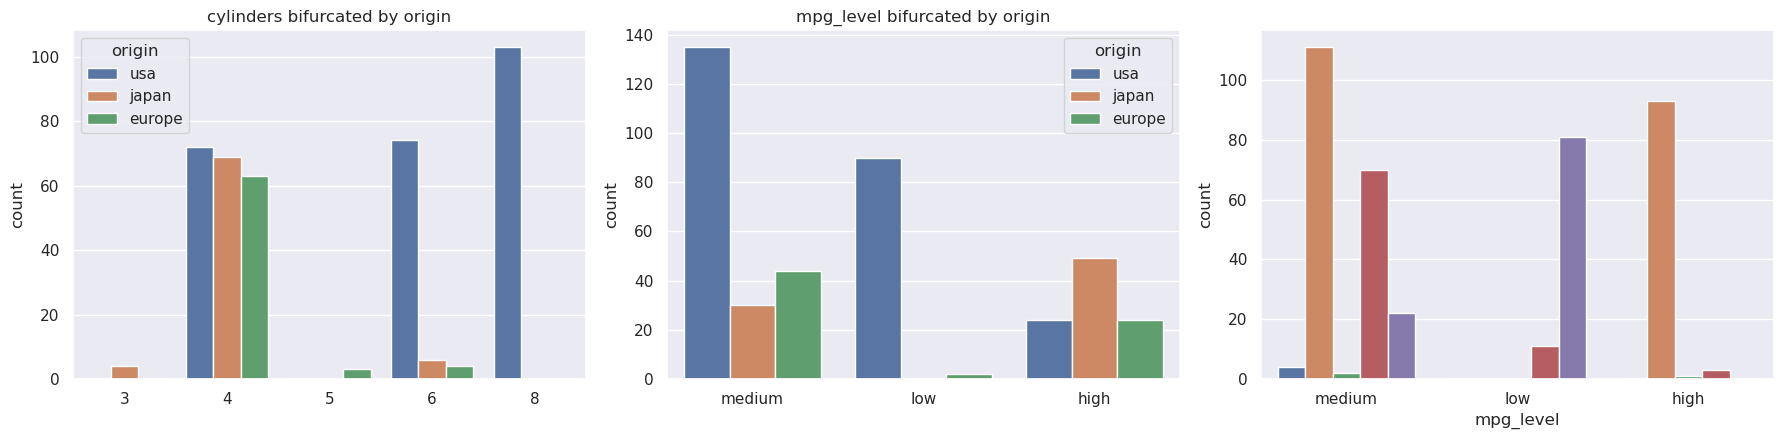

In [40]:
import itertools
combos = itertools.combinations(['origin', 'cylinders', 'mpg_level'], 2)

fig = plt.figure(1, (18, 8))

i = 0
for pair in combos:
#     i+=1
#     ax = plt.subplot(2,3,i)
#     sns.countplot(x=pair[0], hue=pair[1], data=df_cat)
#     ax.set_xlabel(None)
#     ax.set_title(f'{pair[0]} bifurcated by {pair[1]}')
#     plt.tight_layout()

    i+=1
    ax = plt.subplot(2,3,i)
    sns.countplot(x=pair[1], hue=pair[0], data=df_cat)
    ax.set_xlabel(None)
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}')
    plt.tight_layout()


In [ ]:
# CONCLUSIÓNS - Insights

# Pode apreciarse o desvalanceo das categorías

**Cilindros por orixe**
- Xapón é a única orixe con vehículos de 3 cilindros
- Europa é a única orixe con vehículos de 5 cilindros
- USA é a única con vehículos de 8 cilindros
- Todas as orixes teñen vehículos de 4 cilindros mais ou menos na mesma proporción xa que é o máis común
- Toas as orixes teñen vechículos de 6 cindros, aínda que USA ten mais, pois é a que ten maior número de coches en total

**mpg_level por orixe**
- Xapón non ten vehículos de baixo mpg_level, Europa apenas e practicamente todos os dese nivel son de USA
- USA ten a maioría dos vehículos con nivel medio

**mpg_level por cilindros**
- Vehículos con baixo mpg_level teñen 6 ou 8 cilindros, principalmente 8
- Case todos os vehículos de alto mpg_level son de 4 cilindros


**Análise de cruzado das tres variables**

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

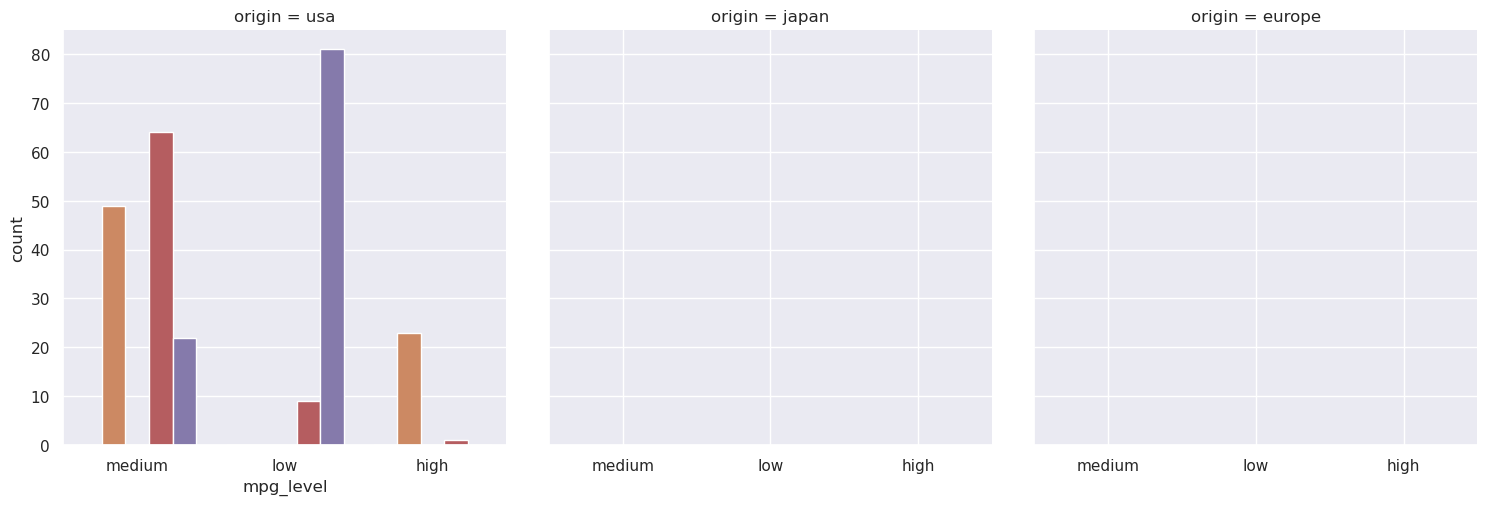

In [41]:
sns.catplot(x='mpg_level', hue='cylinders', col='origin', data=df_cat, kind='count')
plt.show()

**Insights**
- Xapón non ten vehículos con log mpg_level e a maioría teñen un high mpg_level, con 4 cilindros
- En Europa case todos os coches teñen mpg_level medio ou alto e son de 4 cilindros
- USA ten poucos coches con mpg_level alto en comparación con outras zonas, a pesar de que a maior parte dos datos son de USA

**Conclusións**
- Xapón sería a zona que ten maior proporción de coches cun alto mpg_level
- Parece que a medida que o número de cilindros aumenta o mpg_level diminúe (é dicir, consumen máis os coches de maior cilindrada)

#### Análise de 'model_year'

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

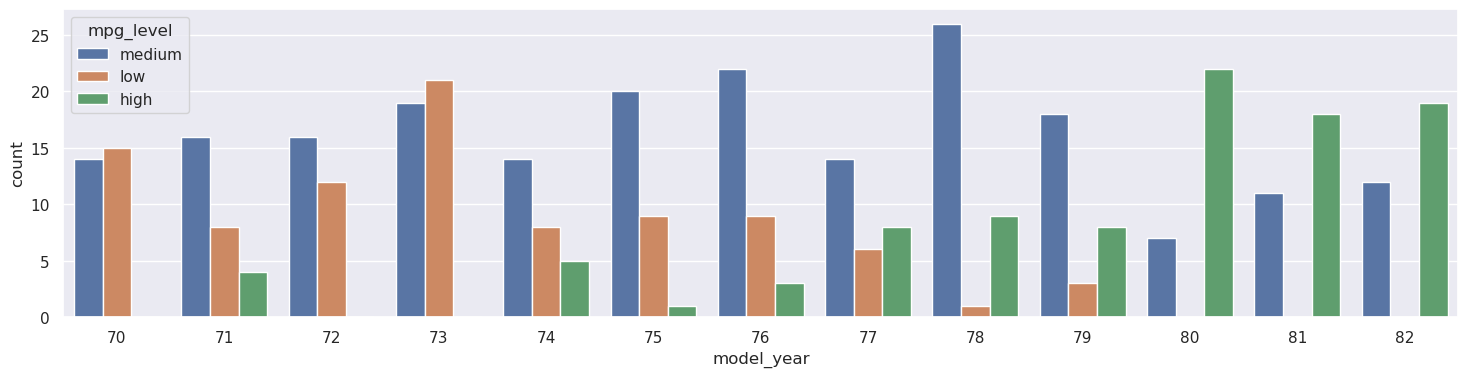

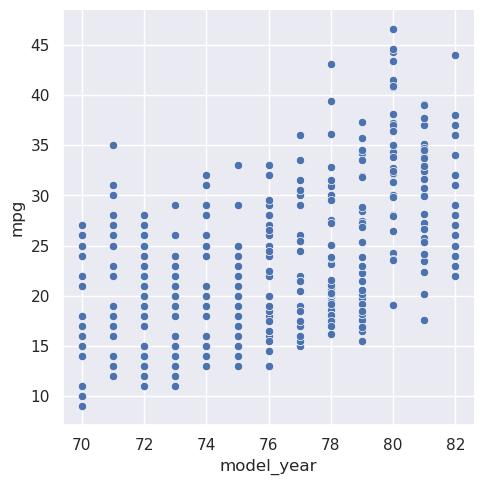

In [42]:
fig = plt.figure(1, (18,4))
sns.countplot(x='model_year', hue='mpg_level', data=df_cat)
sns.relplot(x='model_year', y='mpg', data=df)
plt.show()

**Insights**
- A medida que avanzan os anos baixa o número de modelos con low level (é dicir, coches de alto consumo) a ta que desaparecen no ano 79
- A medida que avanzan os anos medra o número de modelos con high level
- Non houbo cambios significativos na produción de modelos con medium level
- No scatter plot vese unha tendencia de aumento do nivel mpg a medida que pasan os anos

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

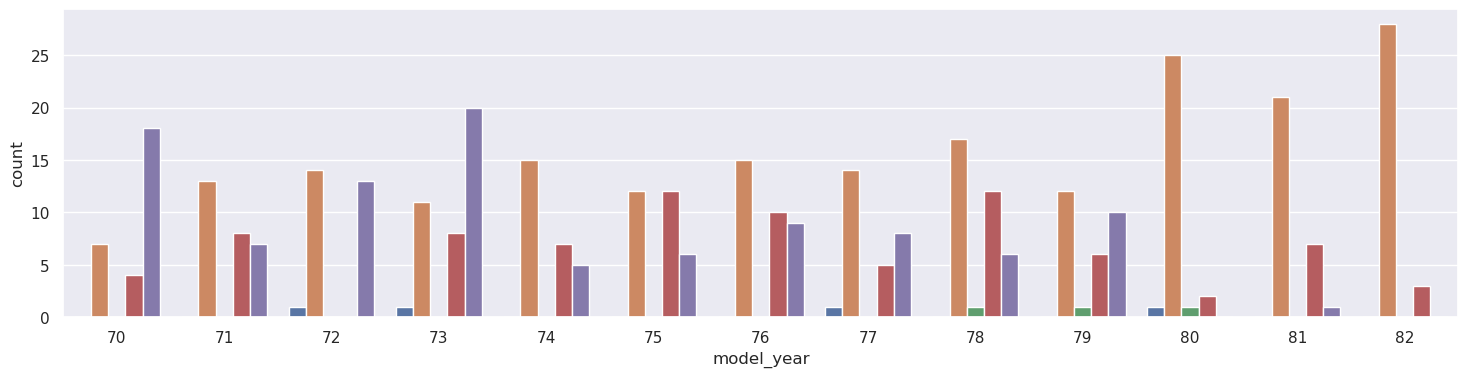

In [43]:
fig = plt.figure(1, (18,4))
sns.countplot(x='model_year', hue='cylinders', data=df_cat)
plt.show()

**Insights**
- A medida que pasan os anos descende o número de coches de 8 e 6 cilindros
- A medida que pasan os anos aumentan o número de coches con menos cilindros
- Os 4 cilindros impóñense como estándar coa maioría de modelos fabricados

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

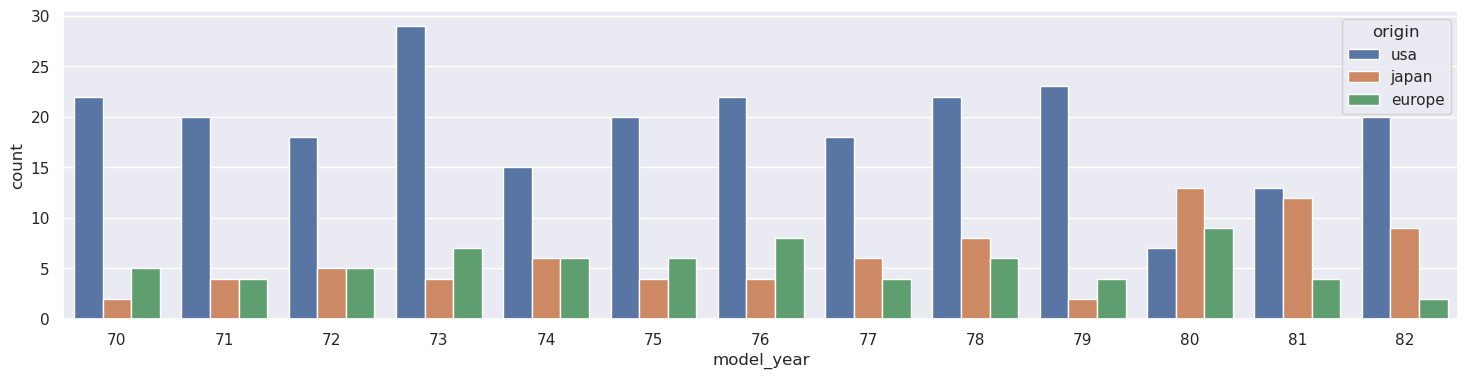

In [44]:
fig = plt.figure(1, (18,4))
sns.countplot(x='model_year', hue='origin', data=df_cat)
plt.show()

**Insights**
- Nos primeiros anos USA domina o mercado con ampla diferenza
- A medida que pasan os anos, especialmente a partir do 80, Europa e Xapón aumentan a súa produción ante unha caída moi pronunciada de USA

#### Análise de 'car_company'

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


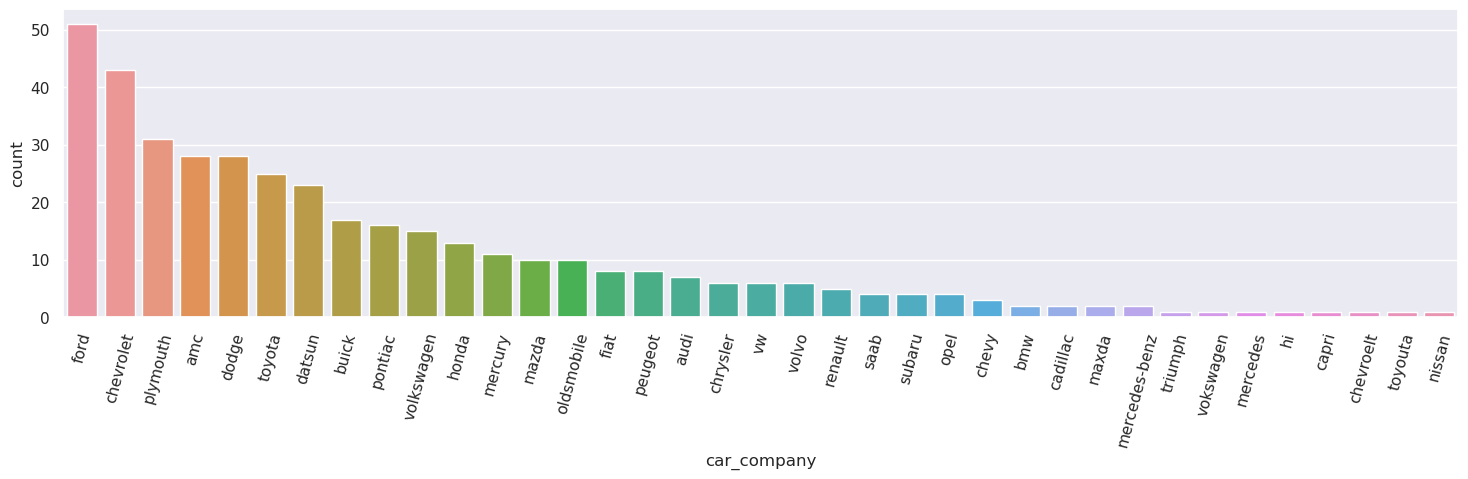

In [45]:
# Como vimos anteriormente, os modelos concéntranse en poucas marcas
fig = plt.figure(1, (18, 4))

ax1 = plt.subplot(1,1,1)
sns.countplot(data=df_cat,x='car_company', order=df_cat['car_company'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

plt.show()

In [46]:
#Seleccionamos só un subconxunto das marcas con mais modelos
top_car_companies = df_cat.car_company.value_counts()[:15].index
top_car_companies

Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'mazda',
       'oldsmobile', 'fiat'],
      dtype='object', name='car_company')

In [47]:
df_cat_top_comp = df_cat[df_cat.car_company.isin(top_car_companies)]
df_cat_top_comp.shape

(329, 6)

/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/xuwira30/miniconda3/envs/sistemas/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

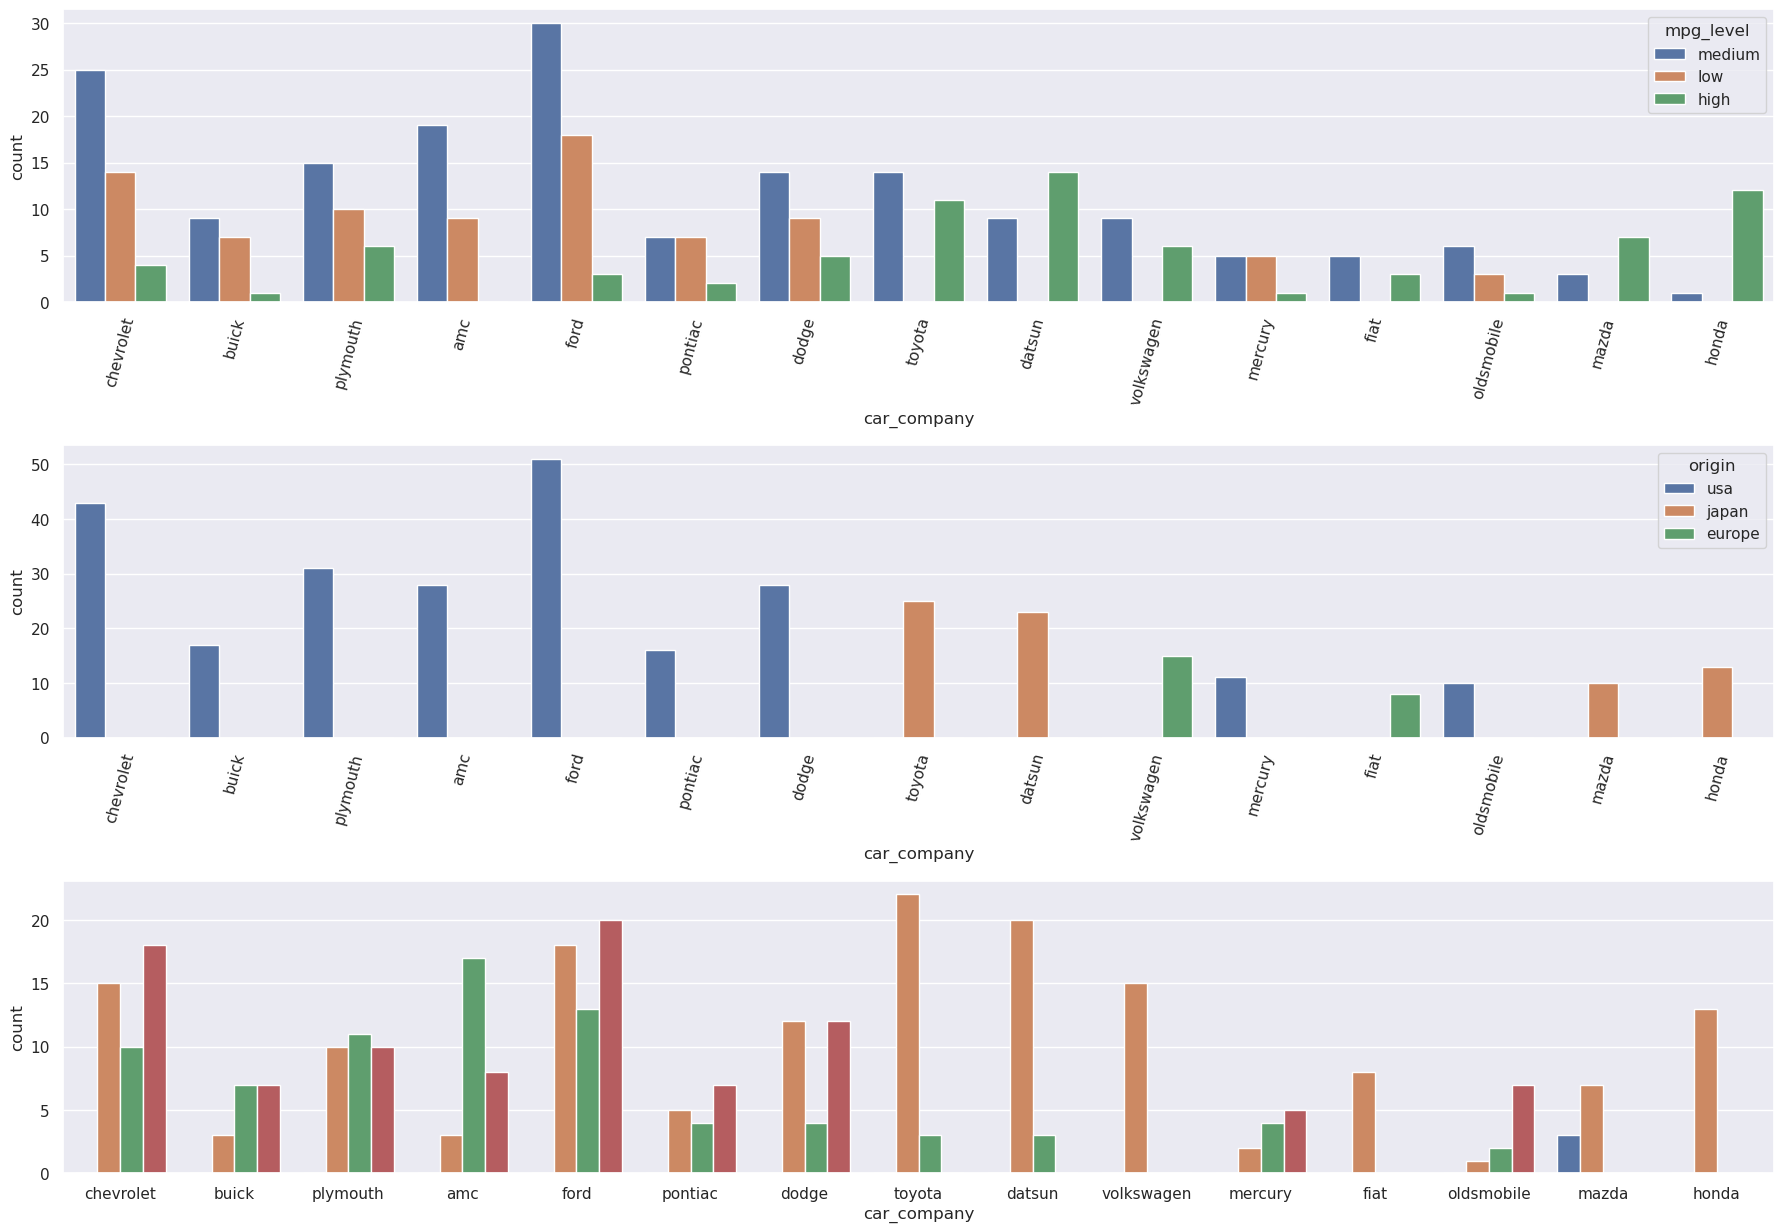

In [48]:
fig = plt.figure(1, (18,12))

for i,cat in enumerate(['mpg_level', 'origin', 'cylinders']):
    ax = plt.subplot(3,1,i+1)
    sns.countplot(x='car_company', hue=cat, data=df_cat_top_comp)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
    plt.tight_layout()

**Insights**
- As compañías con máis modelos teñen vehículos con todos os niveis de consumo mentres que as compañías que teñen pouca producción céntranse nos modelos de alto ou medio consumo.
- A maoiría das empresas con máis producción son USA, e esa é unha das razóns polas que predominan os coches estadounidenses no dataset
- As compañías top céntranse en vechiculos con 4, 6 e 8 cilindros mentres que o resto céntranse en modelos de menos cilindros

In [ ]:
# Ate este punto chega a análise das variables categórigas. Todos os atributos son de interese, excepto 'car_name'
# que podemos eliminar do dataset.
# A reducción de características é unha parte do proceso, eliminar os datos que non nos aportan información.

In [49]:
# Preparamos o dataframe para almacenalo antes de pasar ao seguinte punto da análise
df = pd.concat((df_cat.loc[:, 'origin':'car_company'], df.loc[:, 'mpg':'acceleration']), axis=1)
df.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


In [50]:
# Gardamos os cambios a un novo ficheiro
df.to_csv('mpg_cated.csv', index=False)